Trong buổi này, sẽ ôn lại và nói thêm về Pandas. 

# <font color=blue> Đọc dữ liệu từ file csv vào DataFrame </font> 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Dữ liệu vẫn là bộ "MovieLens 20M" ở bài trước
movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv("ratings.csv")

# <font color=blue>Xem dữ liệu ở DataFrame</font>

## df.head/tail 

In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


## df.info

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


**Kiểu dữ liệu "object" trong Pandas là gì?**

Đọc thử [ở đây](https://stackoverflow.com/questions/21018654/strings-in-a-dataframe-but-dtype-is-object)

In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


**Tại sao df.info không cho biết thông tin về giá trị thiếu (null)?**

In [7]:
ratings_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       20000263 non-null int64
movieId      20000263 non-null int64
rating       20000263 non-null float64
timestamp    20000263 non-null int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


## df.describe và df.hist (dùng cho Series cũng được)

**Làm sao để biết được mặt mũi của cột `rating` trong `ratings_df`?**

Cách 1: nhìn vào dữ liệu của cột `rating` <font color=red>:-(</font>

Cách 2: tóm tắt dữ liệu của cột `rating` bằng các giá trị thống kê <font color=green>:-)</font>

In [8]:
ratings_df.rating.describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

**Cách tính và ý nghĩa của median (50%)?**

Có nhiều cách tính median; tuy nhiên, có thể nói tương đối rằng: 50% "dân số" có giá trị nhỏ hơn median, và 50% có giá trị lớn hơn.

In [9]:
s = pd.Series([7, 2, 7, 4, 0])
s.describe()

count    5.000000
mean     4.000000
std      3.082207
min      0.000000
25%      2.000000
50%      4.000000
75%      7.000000
max      7.000000
dtype: float64

In [10]:
s = pd.Series([0, 2, 4, 7, 8, 12])
s.describe()

count     6.000000
mean      5.500000
std       4.370355
min       0.000000
25%       2.500000
50%       5.500000
75%       7.750000
max      12.000000
dtype: float64

**Mean vs median?**

In [11]:
s = pd.Series([1, 2, 3, 4, 5])
s.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

In [12]:
# Nếu trong dữ liệu có giá trị "outlier" (lớn hoặc nhỏ hơn bình thường)
# thì mean sẽ bị kéo về phía giá trị "outlier"
s = pd.Series([1, 2, 3, 4, 50])
s.describe()

count     5.000000
mean     12.000000
std      21.272047
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max      50.000000
dtype: float64

**Tóm tắt điểm môn học của lớp bằng một con số thì nên dùng mean hay median?**

Cách 3: tóm tắt dữ liệu của cột `rating` bằng histogram <font color=green>:-)</font>

In [13]:
%matplotlib inline
# Theo document:
# "This performs the necessary behind-the-scenes setup 
#  for IPython to work correctly hand in hand with matplotlib"

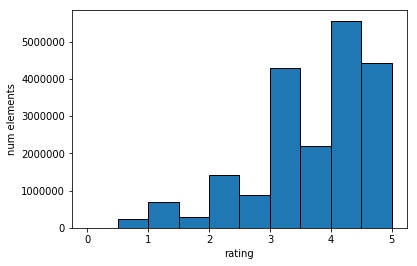

In [14]:
# - Nếu tham số bins = [0, 1, 2, 3] thì câu lệnh hist sẽ tạo ra 3 bin:
#   [0, 1), [1, 2), [2, 3] (để ý bin cuối bao gồm cả 3)
# - Nếu tham số density = False (mặc định) thì chiều cao của cột là số
#   lượng phần tử thuộc về bin tương ứng
ax = ratings_df.rating.hist(bins=np.arange(0, 5.1, 0.5), grid=False, 
                       ec="black", density=False)
ax.set_xlabel("rating")
ax.set_ylabel("num elements");

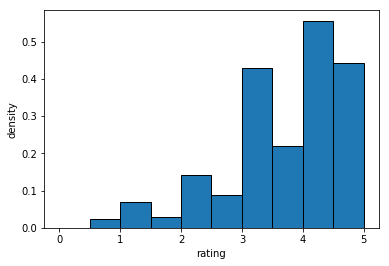

In [15]:
# Nếu tham số density = True thì số lượng phần tử thuộc mỗi bin sẽ
# được chuẩn hóa về tỉ lệ % (cộng hết các bin lại sẽ bằng 1, 1 nghĩa
# là 100%). Lưu ý: tỉ lệ % = diện tích cột (không phải chiều cao cột).
# Với ví dụ bên dưới, các cột có độ rộng bằng nhau nên diện tích cột
# cũng tỉ lệ với chiều cao cột; nếu các cột có độ rộng không bằng nhau
# (histogram cho phép như vậy) thì bạn sẽ cần phải lưu ý.
ax = ratings_df.rating.hist(bins=np.arange(0, 5.1, 0.5), grid=False, 
                       ec="black", density=True)
ax.set_xlabel("rating")
ax.set_ylabel("density");

Thử tóm tắt điểm môn Khoa Học Dữ Liệu năm trước bằng histogram :-).

In [16]:
# Bạn lấy file "dsgrades.csv" ở thùng chứa trên moodle
df = pd.read_csv("dsgrades.csv")
df.head()

,STT,Điểm ĐACK (50%),Điểm các BT (50%),Trung bình
0,1,7.5,6.5,7.0
1,2,0.0,0.0,0.0
2,3,0.0,0.0,0.0
3,4,8.5,4.5,6.5
4,5,0.0,0.5,0.5


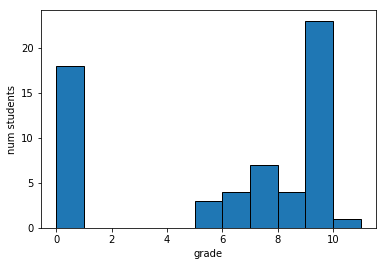

In [17]:
ax = df["Trung bình"].hist(bins=np.arange(0, 11.1, 1), grid=False, 
                       ec="black", density=False)
ax.set_xlabel("grade")
ax.set_ylabel("num students");

# <font color=blue>Truy xuất dữ liệu ở DataFrame</font>

## df.iloc[...]

`df.iloc[r, c]`

- `r` có thể là:
    - Một vị trí (một con số)
    - List các vị trí
    - Slicing theo vị trí
    - Mảng bool (Series bool có được không?)
- `c` tương tự như `r`
- Dùng một vị trí (một con số) thì kết quả sẽ bị giảm chiều
    - Nếu hoặc `r` hoặc `c` là một vị trí (một con số) thì kết quả là Series
    - Nếu cả `r` và `c` đều là một vị trí (một con số) thì kết quả là một giá trị

Truy xuất dòng bằng `df.iloc`?

- `df.iloc[r, :]` 
- `df.iloc[r]`

Truy xuất cột bằng `df.iloc`?

- `df.iloc[:, c]`

## df.loc[...]

`df.loc[r, c]`

- `r` có thể là: 
    - Một tên
    - List các tên
    - Slicing theo tên (khác với slicing theo vị trí, slicing theo tên bao gồm cả start và end)
    - Mảng bool (Series bool có được không?)
- `c` tương tự như `r`
- Dùng một tên thì kết quả sẽ bị giảm chiều
    - Nếu hoặc `r` hoặc `c` là một tên thì kết quả là Series
    - Nếu cả `r` và `c` đều là một tên thì kết quả là một giá trị

Truy xuất dòng bằng `df.loc`?

- `df.loc[r, :]`
- `df.loc[r]`

Truy xuất cột bằng `df.loc`?

- `df.loc[:, c`]

## df[...]

`df[input]`

`input` có thể là:
- Tên cột, hoặc list các tên cột
- Slicing theo vị trí dòng
- Mảng bool (Series bool có được không? Gợi ý: đã học ở buổi trước.)

# <font color=blue>Xử lý dữ liệu chuỗi trong DataFrame</font>

## s.str.xử-lý-x (s ám chỉ Series)

In [18]:
# Tạo và thêm cột "year" (năm sản xuất của phim) vào movies_df

# "\((\d{4})\)" là ngôn ngữ của regular expression, cho biết cần
# tìm trong chuỗi một chuỗi con gồm có 4 chữ số trong dấu mở
# đóng ngoặc, và trong chuỗi con này tôi chỉ muốn rút trích ra
# 4 chữ số chứ không muốn lấy cả dấu ngoặc
movies_df["year"] = movies_df.title.str.extract("\((\d{4})\)", expand=False)
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [19]:
# Để ý, lúc này cột "year" trong movies_df có kiểu dữ liệu 
# là object (string); có thể lúc sau ta sẽ muốn chuyển thành
# số, trước mắt thì cứ tạm để vậy
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 4 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
year       27256 non-null object
dtypes: int64(1), object(3)
memory usage: 852.5+ KB


Cột year có một vài giá trị thiếu! (Tại sao?)

# <font color=blue>Xử lý giá trị thiếu trong DataFrame</font>

## df.dropna (và df.fillna)

In [20]:
# Xóa các dòng có giá trị thiếu
movies_df.dropna(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27256 entries, 0 to 27277
Data columns (total 4 columns):
movieId    27256 non-null int64
title      27256 non-null object
genres     27256 non-null object
year       27256 non-null object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


# <font color=blue>Sắp xếp trong DataFrame</font>

## df.sort_values (và df.sort_index)

In [21]:
# Xem thử gần đây có phim gì?
movies_df.sort_values(by="year", ascending=False)

,movieId,title,genres,year
26504,127160,In Football We Trust (2015),Documentary,2015
26502,127154,The Mask You Live In (2015),Documentary,2015
26505,127162,Most Likely to Succeed (2015),Documentary|Drama,2015
26506,127164,"What Happened, Miss Simone? (2015)",Documentary,2015
26928,129428,The Second Best Exotic Marigold Hotel (2015),Comedy|Drama,2015
27168,130842,Power/Rangers (2015),Action|Adventure|Sci-Fi,2015
27167,130840,Spring (2015),Horror|Romance|Sci-Fi,2015
26720,128552,Jönssonligan - Den perfekta stöten (2015),Action|Adventure|Comedy,2015
27158,130682,Muck (2015),Horror,2015
26516,127188,Advantageous (2015),Children|Drama|Sci-Fi,2015


# <font color=blue>Xử lý dữ liệu thời gian trong DataFrame</font>

## pd.to_datetime

In [22]:
# Chuyển kiểu dữ liệu cột "timestamp" trong ratings_df từ 
# int sang datetime
ratings_df.timestamp = pd.to_datetime(ratings_df.timestamp, unit="s")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [23]:
ratings_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       20000263 non-null int64
movieId      20000263 non-null int64
rating       20000263 non-null float64
timestamp    20000263 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 610.4 MB


## s.dt.xử-lý-x

In [24]:
# Thêm cột "year" vào ratings_df
ratings_df["year"] = ratings_df.timestamp.dt.year
ratings_df.head()

,userId,movieId,rating,timestamp,year
0,1,2,3.5,2005-04-02 23:53:47,2005
1,1,29,3.5,2005-04-02 23:31:16,2005
2,1,32,3.5,2005-04-02 23:33:39,2005
3,1,47,3.5,2005-04-02 23:32:07,2005
4,1,50,3.5,2005-04-02 23:29:40,2005


# <font color=blue>Kết hợp dữ liệu từ nhiều DataFrame</font>
## df.merge

In [25]:
# Trong ratings_df, thông tin về movie chỉ có movieId;
# bây giờ ta sẽ lấy thêm các thông tin khác từ movies_df
full_ratings_df = ratings_df.merge(movies_df)
full_ratings_df.head()

,userId,movieId,rating,timestamp,year,title,genres


In [26]:
# Kết quả là một DataFrame không có dòng nào! Tại sao?

# Mặc định thì phương thức merge sẽ dựa vào các cột mà có
# tên giống nhau ở 2 DataFrame và kết quả sẽ gồm những dòng 
# mà các giá trị xét tại các cột này vừa có ở DataFrame 1 
# vừa có ở DataFrame 2.
# Ở đây, ratings_df và movies_df có 2 cột có tên giống nhau
# là movieId và year; movieId thì giống là đúng rồi, nhưng 
# year của ratings_df khác với year của movies_df (khác cả 
# ý nghĩa lẫn kiểu dữ liệu) nên kết quả sẽ không có dòng nào cả

# Để merge đúng thì ta phải chỉ định là merge chỉ dựa vào cột movieId
full_ratings_df = ratings_df.merge(movies_df, on="movieId")
full_ratings_df.head()

,userId,movieId,rating,timestamp,year_x,title,genres,year_y
0,1,2,3.5,2005-04-02 23:53:47,2005,Jumanji (1995),Adventure|Children|Fantasy,1995
1,5,2,3.0,1996-12-25 15:26:09,1996,Jumanji (1995),Adventure|Children|Fantasy,1995
2,13,2,3.0,1996-11-27 08:19:02,1996,Jumanji (1995),Adventure|Children|Fantasy,1995
3,29,2,3.0,1996-06-23 20:36:14,1996,Jumanji (1995),Adventure|Children|Fantasy,1995
4,34,2,3.0,1996-10-28 13:29:44,1996,Jumanji (1995),Adventure|Children|Fantasy,1995


In [36]:
# Số dòng của ratings_df có bằng full_ratings_df?
# Tại sao? (Gợi ý: Lúc nãy đã bỏ đi một số dòng ở movies_df)
print(len(ratings_df))
print(len(full_ratings_df))

20000263
19999858


In [28]:
# Ta thấy trong DataFrame full_ratings_df ở trên, 
# 2 cột year được Pandas tự động rename lại là year_x
# và year_y, trong đó year_x là year của ratings_df,
# còn year_y là year của movies_df.

# Ta sẽ rename lại 2 cột này cho dễ nhớ hơn
full_ratings_df.rename(columns={"year_x": "rating_year", 
                                "year_y": "movie_year"}, inplace=True)
full_ratings_df.head()

,userId,movieId,rating,timestamp,rating_year,title,genres,movie_year
0,1,2,3.5,2005-04-02 23:53:47,2005,Jumanji (1995),Adventure|Children|Fantasy,1995
1,5,2,3.0,1996-12-25 15:26:09,1996,Jumanji (1995),Adventure|Children|Fantasy,1995
2,13,2,3.0,1996-11-27 08:19:02,1996,Jumanji (1995),Adventure|Children|Fantasy,1995
3,29,2,3.0,1996-06-23 20:36:14,1996,Jumanji (1995),Adventure|Children|Fantasy,1995
4,34,2,3.0,1996-10-28 13:29:44,1996,Jumanji (1995),Adventure|Children|Fantasy,1995


# <font color=blue>Gom nhóm và tính toán trong mỗi nhóm</font>
## df.groupby(tên-cột hoặc list-tên-cột).tính-toán-x

In [29]:
# Từ full_ratings_df, cho biết mỗi movie có bao nhiêu người đánh
# giá và điểm trung bình là bao nhiêu?
g = full_ratings_df[["title", "rating"]].groupby("title").agg(["size", "mean"])
g.head()

rating          
                                                     size      mean
title                                                              
"Great Performances" Cats (1998)                      155  2.748387
#chicagoGirl: The Social Network Takes on a Dic...      3  3.666667
$ (Dollars) (1971)                                     24  2.833333
$5 a Day (2008)                                        39  2.871795
$9.99 (2008)                                           55  3.009091

In [30]:
# Tìm các movie có số người đánh giá > 100 và có điểm trung bình > 4
# (Cẩn thận độ ưu tiên khi dùng toán tử &)
g[(g[("rating", "size")] > 100) & (g[("rating", "mean")] > 4)]

rating          
                                                     size      mean
title                                                              
12 Angry Men (1957)                                 12934  4.224138
28 Up (1985)                                          756  4.023148
3-Iron (Bin-jip) (2004)                              1037  4.012054
39 Steps, The (1935)                                 3624  4.003311
400 Blows, The (Les quatre cents coups) (1959)       2851  4.136268
42 Up (1998)                                         1120  4.070089
8 1/2 (8½) (1963)                                    3096  4.050226
African Queen, The (1951)                           10526  4.101558
Alien (1979)                                        30933  4.041784
Aliens (1986)                                       27206  4.005642
All About Eve (1950)                                 4826  4.204103
All About My Mother (Todo sobre mi madre) (1999)     4332  4.012235
All the President's Men (1976)                       4390  4.039066
Amadeus (1984)                                      20545  4.073887
Amelie (Fabuleux destin d'Amélie Poulain, Le) (...  24349  4.197072
American Beauty (1999)                              44987  4.155934
American History X (1998)                           23309  4.151208
Amores Perros (Love's a Bitch) (2000)                5511  4.016875
Anatomy of a Murder (1959)                           1702  4.060517
Andrei Rublev (Andrey Rublyov) (1969)                 579  4.075993
Annie Hall (1977)                                   15383  4.081259
Antonia's Line (Antonia) (1995)                      2538  4.004925
Apartment, The (1960)                                5125  4.046146
Apocalypse Now (1979)                               23090  4.108900
Arsenic and Old Lace (1944)                          6894  4.053597
Badlands (1973)                                      2140  4.044860
Band of Brothers (2001)                              4305  4.263182
Baraka (1992)                                        1440  4.051042
Battle of Algiers, The (La battaglia di Algeri)...   1238  4.069467
Battlestar Galactica (2003)                          2884  4.025659
...                                                   ...       ...
Top Hat (1935)                                       2120  4.058019
Touch of Evil (1958)                                 4718  4.183022
Touching the Void (2003)                             2123  4.048281
Toy Story 3 (2010)                                   5781  4.012974
Trainspotting (1996)                                23589  4.011234
Treasure of the Sierra Madre, The (1948)             5155  4.161397
Trust (1990)                                          942  4.042994
Unvanquished, The (Aparajito) (1957)                  338  4.031065
Up (2009)                                            9264  4.038266
Usual Suspects, The (1995)                          47006  4.334372
Vertigo (1958)                                      14094  4.148006
Virgin Spring, The (Jungfrukällan) (1960)             477  4.038784
WALL·E (2008)                                       12176  4.038929
Wages of Fear, The (Salaire de la peur, Le) (1953)    712  4.082865
Wallace & Gromit: A Close Shave (1995)              12073  4.167315
Wallace & Gromit: The Best of Aardman Animation...   8171  4.109473
Wallace & Gromit: The Wrong Trousers (1993)         15022  4.181068
When We Were Kings (1996)                            3737  4.158416
Whiplash (2014)                                       602  4.074751
White Heat (1949)                                     636  4.007075
Who's Afraid of Virginia Woolf? (1966)               3083  4.051573
Wild Bunch, The (1969)                               3174  4.004726
Wild Strawberries (Smultronstället) (1957)           1646  4.106015
Wings of Desire (Himmel über Berlin, Der) (1987)     3654  4.024767
Winter Light (Nattvardsgästerna) (1963)               318  4.029874
Witness for the Prosecution (1957)     

# <font color=blue>Tổ chức lại dữ liệu trong DataFrame</font>
## df.unstack (và df.stack)

In [31]:
# Từ full_ratings_df, cho biết: 
# trong mỗi năm (rating_year), mỗi movie được bao nhiêu người đánh giá?
# (kết quả có dạng: dòng là rating_year, cột là title của movie)

# Sau cùng cho biết: trong mỗi năm, movie nào là movie của năm (được
# nhiều người đánh giá nhất)?

In [32]:
df = full_ratings_df[["rating_year", "title", "rating"]]
df = pd.DataFrame(df.groupby(["rating_year", "title"]).size())
df.head(10)

0
rating_year title                                                  
1995        Double Life of Veronique, The (Double Vie de Vé...    1
            Fish Called Wanda, A (1988)                           1
            Get Shorty (1995)                                     1
            Seven (a.k.a. Se7en) (1995)                           1
1996        'Til There Was You (1997)                            21
            1-900 (06) (1994)                                    41
            101 Dalmatians (1996)                               341
            12 Angry Men (1957)                                 170
            2 Days in the Valley (1996)                         300
            2 ou 3 choses que je sais d'elle (2 or 3 Things...   15

In [33]:
df.unstack(level=1).head() # Wow!

0  \
title       "Great Performances" Cats (1998)   
rating_year                                    
1995                                     NaN   
1996                                     NaN   
1997                                     NaN   
1998                                     NaN   
1999                                     NaN   

                                                                         \
title       #chicagoGirl: The Social Network Takes on a Dictator (2013)   
rating_year                                                               
1995                                                       NaN            
1996                                                       NaN            
1997                                                       NaN            
1998                                                       NaN            
1999                                                       NaN            

                                                             \
title       $ (Dollars) (1971) $5 a Day (2008) $9.99 (2008)   
rating_year                                                   
1995                       NaN             NaN          NaN   
1996                       NaN             NaN          NaN   
1997                       NaN             NaN          NaN   
1998                       NaN             NaN          NaN   
1999                       NaN             NaN          NaN   

                                                       \
title       $ellebrity (Sellebrity) (2012) '71 (2014)   
rating_year                                             
1995                                   NaN        NaN   
1996                                   NaN        NaN   
1997                                   NaN        NaN   
1998                                   NaN        NaN   
1999                                   NaN        NaN   

                                                     \
title       'Hellboy': The Seeds of Creation (2004)   
rating_year                                           
1995                                            NaN   
1996                                            NaN   
1997                                            NaN   
1998                                            NaN   
1999                                            NaN   

                                                            \
title       'Human' Factor, The (Human Factor, The) (1975)   
rating_year                                                  
1995                                                   NaN   
1996                                                   NaN   
1997                                                   NaN   
1998                                                   NaN   
1999                                                   NaN   

                                                ...                         \
title       'Neath the Arizona Skies (1934)     ...     ¡Qué hacer! (1970)   
rating_year                                     ...                          
1995                                    NaN     ...                    NaN   
1996                                    NaN     ...                    NaN   
1997                                    NaN     ...                    NaN   
1998                                    NaN     ...                    NaN   
1999                                    NaN     ...                    NaN   

                                                                           \
title       ¡Three Amigos! (1986) À l'aventure (2008) À nos amours (1983)   
rating_year                                                                 
1995                          NaN                 NaN                 NaN   
1996                          NaN                 NaN                 NaN   
1997                          NaN                 NaN                 NaN   
1998                          NaN                 NaN                 

In [34]:
df1 = df.unstack(level=1).fillna(0)
df1.columns = df1.columns.droplevel(0)
df1.head()

title,"""Great Performances"" Cats (1998)",#chicagoGirl: The Social Network Takes on a Dictator (2013),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Neath the Arizona Skies (1934),...,¡Qué hacer! (1970),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Árido Movie (2005),Åsa-Nisse - Wälkom to Knohult (2011),Üvegtigris (2001),貞子3D (2012)
rating_year,,,,,,,,,,,,,,,,,,,,,
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Movie của năm!
df1.idxmax(axis=1)

rating_year
1995    Double Life of Veronique, The (Double Vie de V...
1996                                        Batman (1989)
1997                 Independence Day (a.k.a. ID4) (1996)
1998                                       Titanic (1997)
1999    Star Wars: Episode V - The Empire Strikes Back...
2000                               American Beauty (1999)
2001    Crouching Tiger, Hidden Dragon (Wo hu cang lon...
2002    Lord of the Rings: The Fellowship of the Ring,...
2003        Lord of the Rings: The Two Towers, The (2002)
2004    Lord of the Rings: The Return of the King, The...
2005        Lord of the Rings: The Two Towers, The (2002)
2006    Lord of the Rings: The Return of the King, The...
2007                                   Matrix, The (1999)
2008                                   Matrix, The (1999)
2009                              Dark Knight, The (2008)
2010                                        Avatar (2009)
2011                                     Inception (2010)
20